In [4]:
from PyPDF2 import PdfReader
pdf_files = ['inputdata/2024-large-group-health-plans-brochure.pdf', 'inputdata/2024-fixed-funding-benefit-designs.pdf', 'inputdata/baags-seh-2024.pdf']


def format_docs(pdf_files):
    text = ""
    for pdf_file in pdf_files:
        reader = PdfReader(pdf_file)
        for i in range(0, len(reader.pages)):
            page = reader.pages[i]
            text += page.extract_text() + " "
    return text

text= format_docs(pdf_files) 

In [2]:
def display_word_cloud(top_100_words):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_100_words))

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

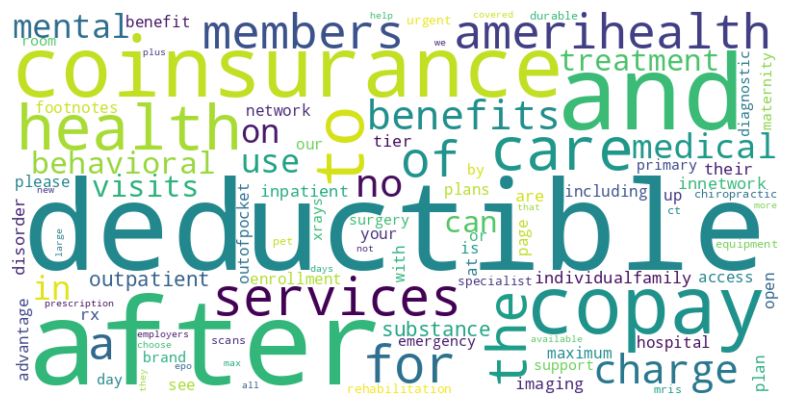

In [5]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = re.sub(r'[^a-zA-Z\s]', '', text)
text = text.lower()
words = text.split()
word_counts = Counter(words)
top_100_words = word_counts.most_common(100)

display_word_cloud(top_100_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avssm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


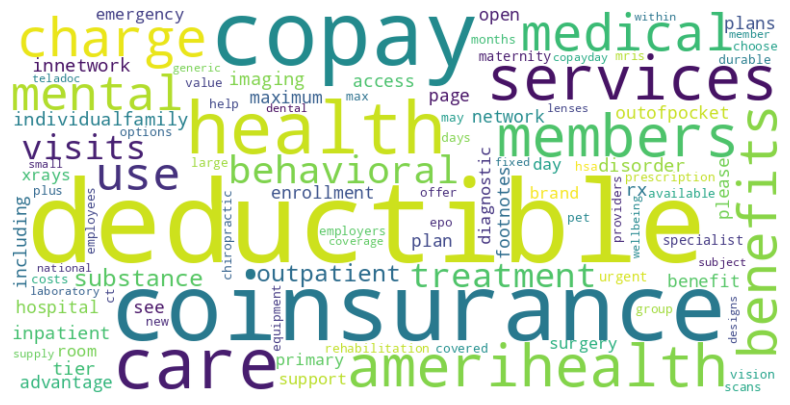

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Filter out stop words from your list of words
filtered_words = [word for word in words if word not in stop_words]
word_counts_filtered = Counter(filtered_words)

# If you still want to limit it to the top 100 words
top_100_words_filtered = word_counts_filtered.most_common(100)

display_word_cloud(top_100_words_filtered)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avssm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\avssm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avssm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


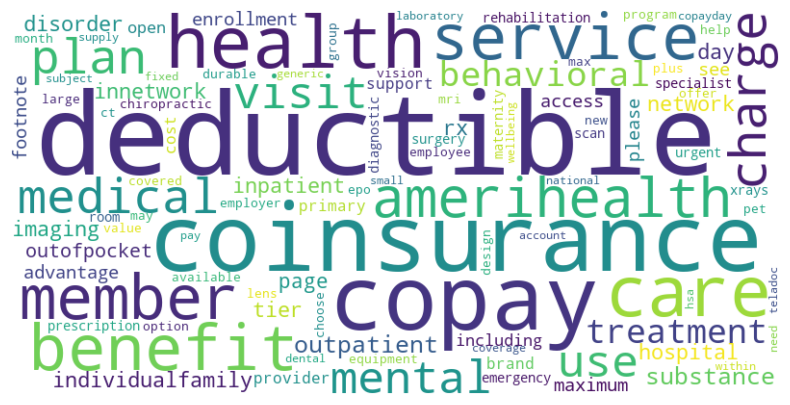

In [25]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
tokens = word_tokenize(text)  # Tokenize the text
stop_words = set(stopwords.words('english'))

# Lemmatize tokens and remove stop words
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]

# Recount words
word_counts = Counter(lemmatized_tokens)

# Extract the top 100 words
top_100_words_lemmatized = word_counts.most_common(100)
display_word_cloud(top_100_words_lemmatized)

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema.document import Document

documents = [Document(page_content=text, metadata={"source": "local"})]
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=40)
all_splits = text_splitter.split_documents(documents)

In [8]:
import os
import json 
from dotenv import load_dotenv
load_dotenv()
 # accessing and printing value
#print(os.getenv("HF_TOKEN"))

True

In [34]:
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2", model_kwargs={"device": "cpu"})

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\avssm\AppData\Roaming\Python\Python311\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [9]:
from langchain_community.embeddings import OllamaEmbeddings
ollama_emb = OllamaEmbeddings(
    model="mxbai-embed-large:latest",
)

In [10]:
from langchain.vectorstores import Chroma
vectordb_paper = Chroma.from_documents(documents=all_splits, embedding=ollama_emb, persist_directory="chroma_db_AMHpdf")
retriever_paper = vectordb_paper.as_retriever()

KeyboardInterrupt: 

In [40]:
from langchain_community.llms import Ollama
llm = Ollama(model="llama3:latest")

In [42]:
from langchain.chains import RetrievalQA
qa_paper = RetrievalQA.from_chain_type(
    llm,
    chain_type="stuff",
    retriever=retriever_paper,
    verbose=True
)

C:\Users\avssm\AppData\Roaming\Python\Python311\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new RetrievalQA chain...

> Finished chain.


{'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\ninnetwork benefitna na\npreventive services\nexamsevaluations\nno charge not subject to deductible no charge not subject to deductible\ncleaningsxrays\nfluoride treatments sealants\n\nmedical benefits innetwork outofnetwork\ndeductible     \nindividualfamily  \nmaximum outofpocket    \nindividualfamily  \nprimary care visits  copay  coinsurance   \nafter deductible\n\nmedical benefits innetwork outofnetwork\ndeductive     \nindividualfamily  \nmaximum outofpocket    \nindividualfamily  \nprimary care visits  copay  coinsurance   \nafter deductible\n\nmedical benefits innetwork outofnetwork\ndeductible     \nindividualfamily  \nmaximum outofpocket    \nindividualfamily  \nprimary care visits  copay  coinsurance   \nafter deductible\n\nQuestion: What are the preventive services that are available at no charge and

In [44]:
def rag_manager(qa, query):
    print("\nResult: ", qa.run(query))

In [82]:
rag_manager(qa_paper, "What are the bronze plans?")



> Entering new RetrievalQA chain...

> Finished chain.

Result:  Based on the provided context, it appears that the bronze plans are not explicitly mentioned. However, I can try to infer some information from the given text.

The passage mentions various benefits and allowances related to medical services, such as preventive services like exams, evaluations, cleanings, X-rays, fluoride treatments, and sealants, which are available at no charge and not subject to a deductible. There is also an allowance for contact lenses and prescription mail order benefit with an applicable cost-sharing for a day supply.

Given the context, it seems that bronze plans might be a type of health insurance plan that offers basic coverage for preventive services and some medical expenses. However, without further information or clarification from the original text, I don't know specifically what is included in these bronze plans.


In [76]:
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

In [78]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"))])

In [72]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
# Building the RAG
rag_web = (
    {"context": retriever_paper | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [74]:
rag_web.invoke("Tell me about EPO health plans ?")

AttributeError: 'Document' object has no attribute 'seek'

In [46]:
import gradio as gr

In [60]:
def respond(input_text):
    response = rag_pdf(qa_paper, input_text)
    return response

with gr.Blocks() as app:
    gr.Markdown("## Q/A system ##")
    with gr.Row():
        input_text = gr.Textbox(label="Your Input")
        submit_button = gr.Button("Submit")
    output_text = gr.Textbox(label="Response from the BOT")
    submit_button.click(fn=respond, inputs=[input_text], outputs=output_text)

app.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
